# 1. Data Loading and Overview

In [63]:
import pandas as pd

In [64]:
#from google.colab import files
#uploaded = files.upload()

In [65]:
df = pd.read_csv('/content/insurance.csv')

In [66]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [68]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [69]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# 2. Exploratory Data Analysis

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

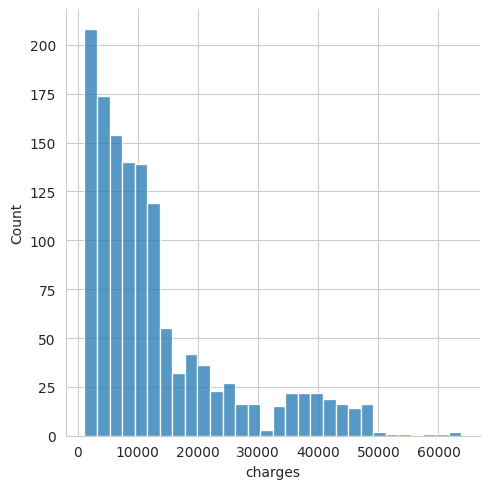

In [71]:
hist = sns.displot(df['charges'])

The distribution of the health insurance charge is right-skewed.

In [72]:
# charges by region
charges = df['charges'].groupby(df['region']).sum().sort_values(ascending = True)
print(charges)

region
southwest    4.012755e+06
northwest    4.035712e+06
northeast    4.343669e+06
southeast    5.363690e+06
Name: charges, dtype: float64


In [73]:
# plotting charges by region
import plotly.express as px

In [74]:
fig = px.bar(charges,
             title = 'Charges by Region',
             color=charges,
             color_continuous_scale='plasma')
fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),
    titlefont=dict(size=20),
    xaxis_tickangle=-45, # specify the angle at which x-axis lablels are displayed
)
fig.update_yaxes(showticklabels=False, title=' ')
fig.update_xaxes(title=' ')
fig.update_traces(
    texttemplate='%{y}', # display y values as text
    textposition='outside',
    hovertemplate='<b>%{x}</b><br>Charges: %{y}',
)
fig.show()


<Axes: xlabel='region', ylabel='charges'>

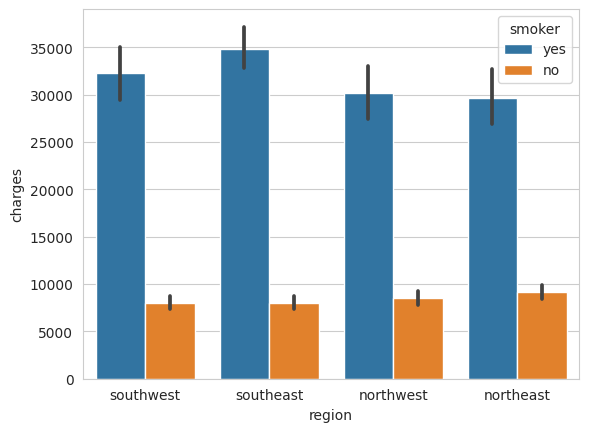

In [75]:
# plotting charges by region with smokers
sns.barplot(data = df,
            x = 'region', y = 'charges',
            hue = 'smoker')

<Axes: xlabel='children', ylabel='charges'>

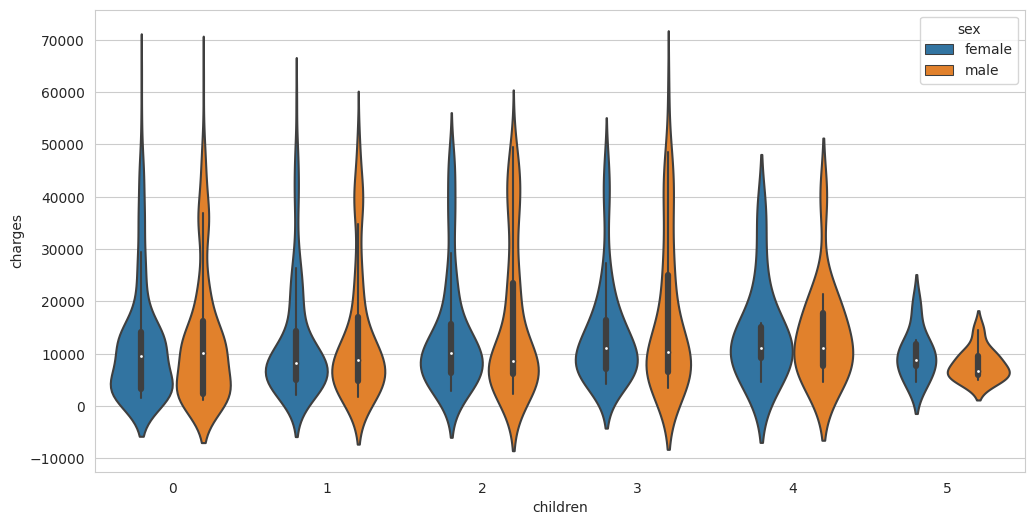

In [76]:
plt.figure(figsize=(12,6))
sns.violinplot(data = df, x = 'children', y = 'charges', hue = 'sex')

<Axes: xlabel='region', ylabel='charges'>

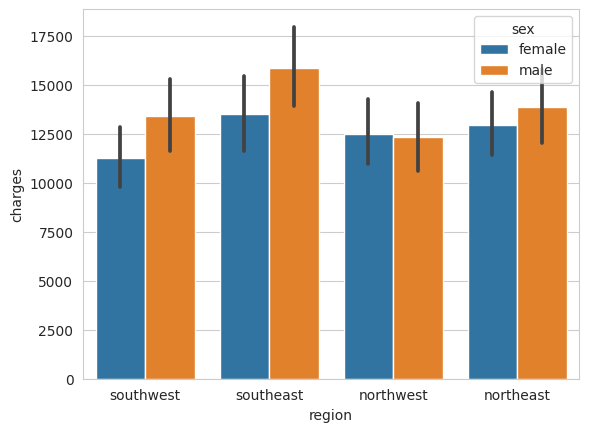

In [77]:
# plotting charges by region with gender
sns.barplot(data = df,
            x = 'region', y = 'charges',
            hue='sex')

<Axes: xlabel='region', ylabel='charges'>

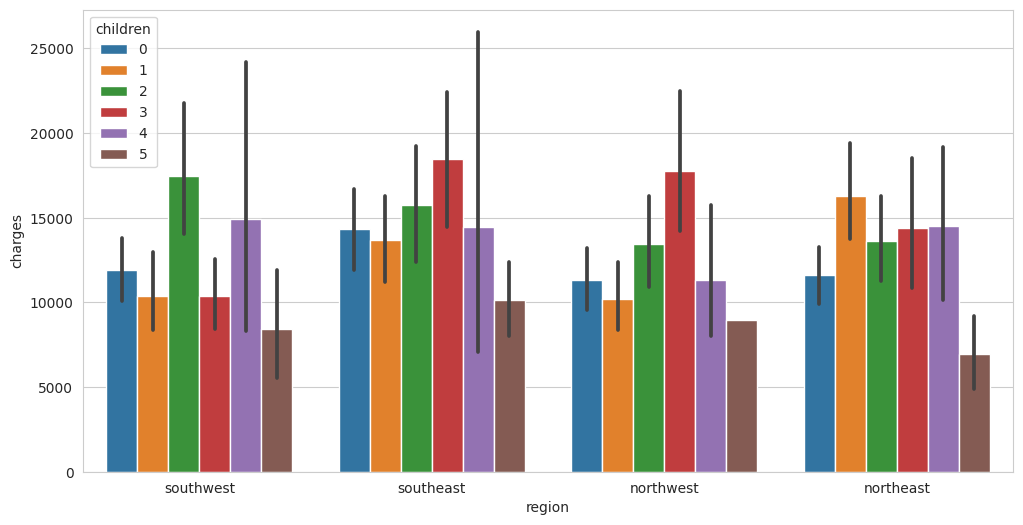

In [78]:
# plotting charges by region w/ number of children
plt.figure(figsize=(12,6))
sns.barplot(data = df,
            x = 'region', y ='charges',
            hue = 'children')

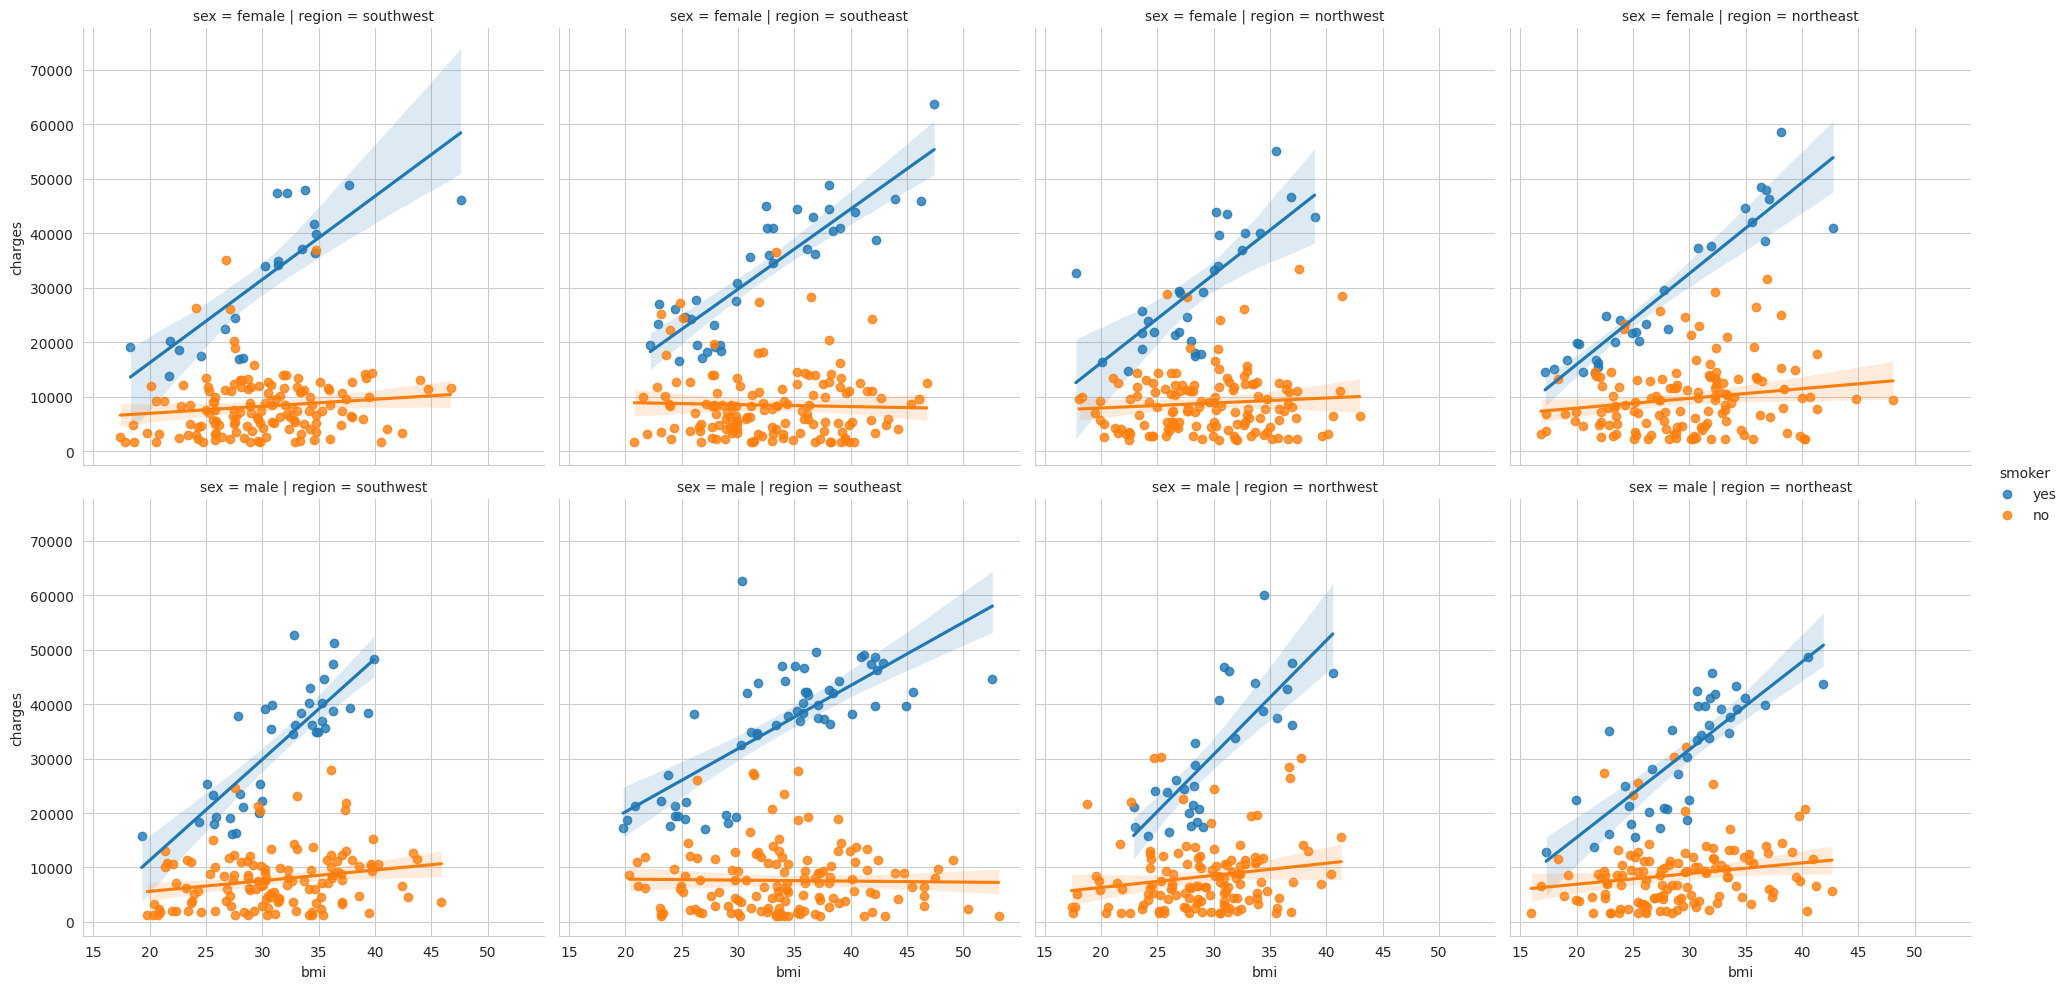

In [79]:
#regression plot to understand the relationship between the bmi and charges considering
sns.lmplot(x = "bmi", y = "charges", row = "sex", col = "region", hue = 'smoker', data = df)

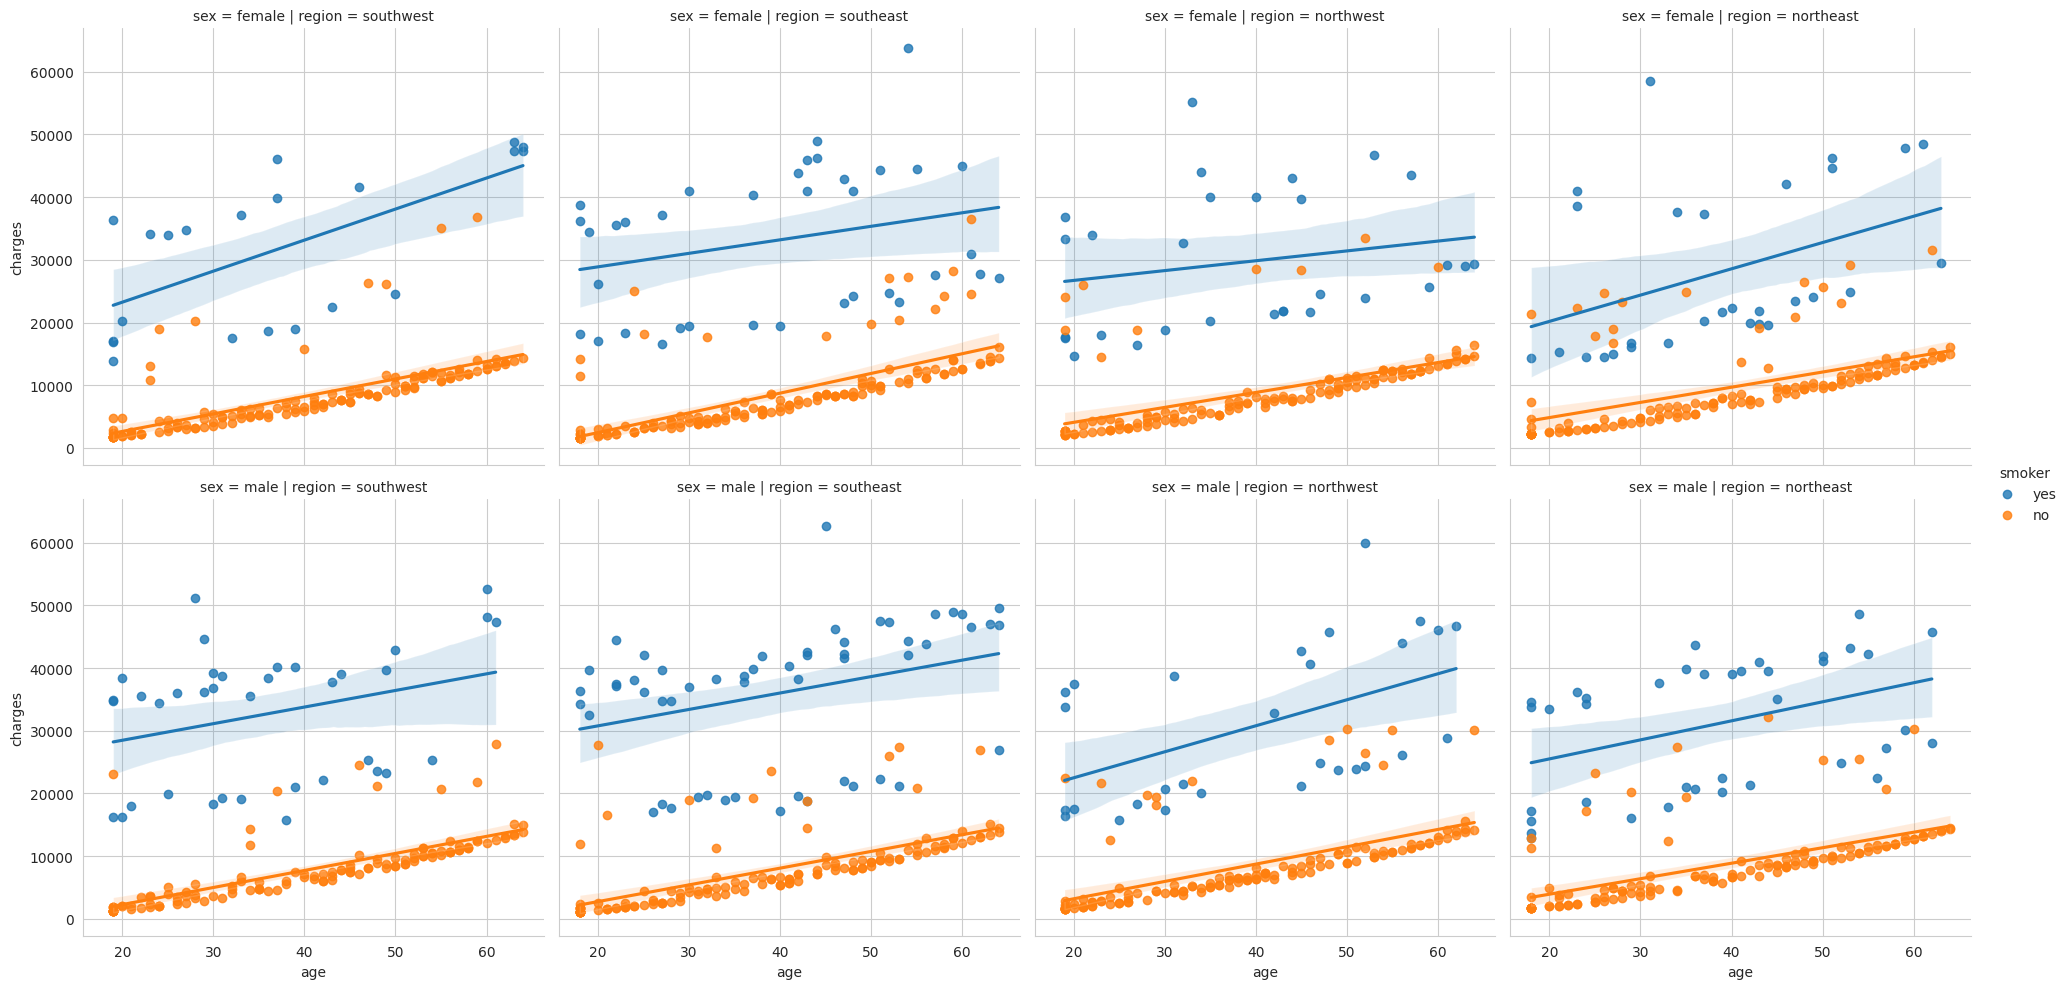

In [80]:
#regression plot to understand the relationship between the Age and Charges considering
sns.lmplot(x = "age", y = "charges", row = "sex", col = "region", hue = 'smoker', data = df)

The trend shows that patients who are smokers have a higher health insurance charge than patients who are not smokers.

# 3. Data Preprocessing

In [81]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [82]:
# Convert object labels to categorical data type
df[['sex', 'region', 'smoker']] = df[['sex', 'region', 'smoker']].astype('category')

# Converting category labels into numerical using LabelEncoder
from sklearn import preprocessing
label = preprocessing.LabelEncoder()

label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)

label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)

label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)

<Axes: >

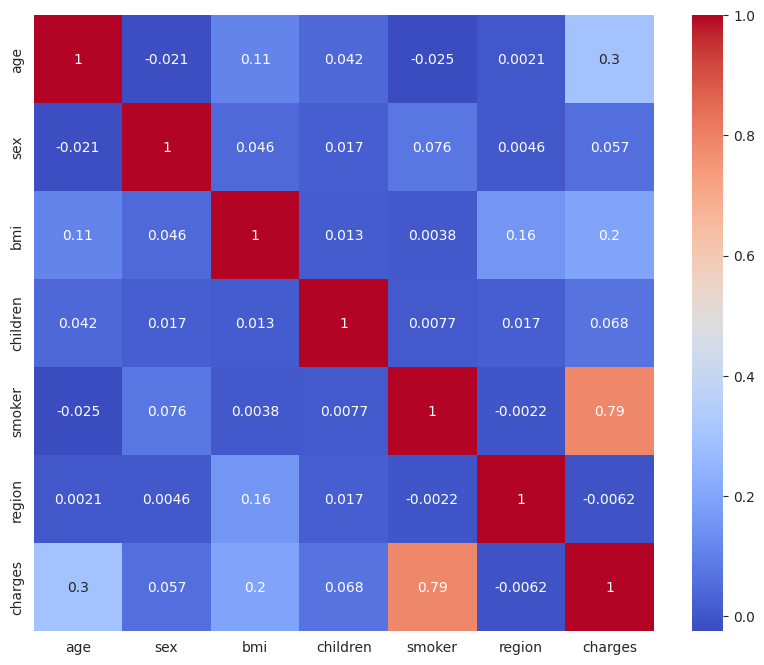

In [83]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [84]:
#we split our model
X = df.drop(['charges'], axis = 1)
y = df['charges']

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

# 4. Regression Models

### 4.1 OLS Regression

In [86]:
import statsmodels.api as sm
#add constant to predictor variables
x2 = sm.add_constant(X_train)
#fit linear regression model
model = sm.OLS(y_train, x2).fit()

In [87]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     453.5
Date:                Fri, 15 Sep 2023   Prob (F-statistic):          5.67e-272
Time:                        21:58:13   Log-Likelihood:                -9492.5
No. Observations:                 936   AIC:                         1.900e+04
Df Residuals:                     929   BIC:                         1.903e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.197e+04   1178.741    -10.152      0.000   -1.43e+04   -9653.233
age          258.0105     14.435     17.874      0.000     229.681     286.340
sex          -89.4250    405.818     -0.220      0.826    -885.852     707.002
bmi          343.8197     34.793      9.882      0.000     275.537     412.102
children     479.3167    165.462      2.897      0.004     154.594     804.039
smoker       2.37e+04    507.168     46.737      0.000    2.27e+04    2.47e+04
region      -388.4342    186.289     -2.085      0.037    -754.031     -22.837
==============================================================================
Omnibus:                      217.020   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              488.422
Skew:                           1.260   Prob(JB):                    8.72e-107
Kurtosis:                       5.484   Cond. No.                         300.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The 'sex' variable has a p-value larger than 0.05, so it will not be considered statistically significant.

**R-squared**

The adjusted R-squared square is 0.744, meaning that 74.4% of the variance in health insurance charges can be explained by the model.

### 4.2 Multiple Linear Regression

In [88]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [89]:
lm.fit(X_train,y_train)

LinearRegression()

In [90]:
print('Intercept', lm.intercept_)
print('Coefficient', lm.coef_)
print('Score', lm.score(X_test, y_test))

Intercept -11966.536839327011
Coefficient [  258.01052077   -89.42500591   343.81965818   479.31668732
 23703.74833645  -388.43417176]
Score 0.7626072475418817


In [91]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
age,258.010521
sex,-89.425006
bmi,343.819658
children,479.316687
smoker,23703.748336
region,-388.434172


In [92]:
# model prediction
y_pred1 = lm.predict(X_test)

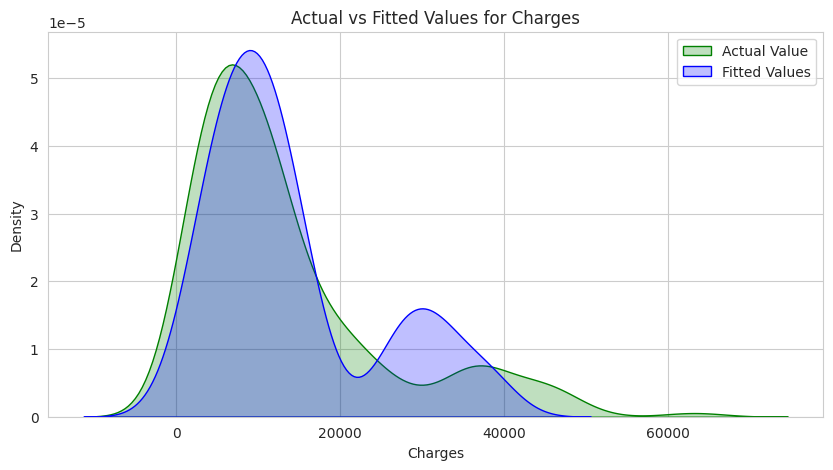

In [93]:

plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")  # Set the style to whitegrid for better readability

# Create a single axes for the plot
ax = sns.kdeplot(y_test, color="g", label="Actual Value", fill=True)
sns.kdeplot(y_pred1, color="b", label="Fitted Values", fill=True, ax=ax)

# Set plot title and labels
plt.title('Actual vs Fitted Values for Charges')
plt.xlabel('Charges')
plt.ylabel('Density')
# Add a legend
plt.legend()
# Show the plot
plt.show()

In [94]:
#DATAFRAME FOR ACTUAL AND PREDICTED VALUE
predicted1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred1})
predicted1.head()

,Actual,Predicted
650,9800.88820,15531.966721
319,4667.60765,9516.198445
314,34838.87300,28334.130309
150,5125.21570,5361.657249
336,12142.57860,11497.719059


### 4.3 Lasso Regression Model

In [96]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold

In [97]:
#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=4, random_state=123)
#define model
lasso_model = LassoCV(alphas=(0.1, 1.0, 10.0), cv=cv, n_jobs=-1)
#fit model
lasso_model.fit(X_train, y_train)

LassoCV(alphas=(0.1, 1.0, 10.0),
        cv=RepeatedKFold(n_repeats=4, n_splits=10, random_state=123),
        n_jobs=-1)

In [115]:
print('Intercept: ', lasso_model.intercept_)
print('Coefficient: ', lasso_model.coef_)
print('Score: ', lasso_model.score(X_test, y_test))

Intercept:  -11966.22721450989
Coefficient:  [  258.09715931   -45.0246117    343.21138132   471.92408453
 23637.61322076  -379.3491619 ]
Score:  0.762546919680229


In [99]:
# model prediction
y_pred2 = lasso_model.predict(X_test)

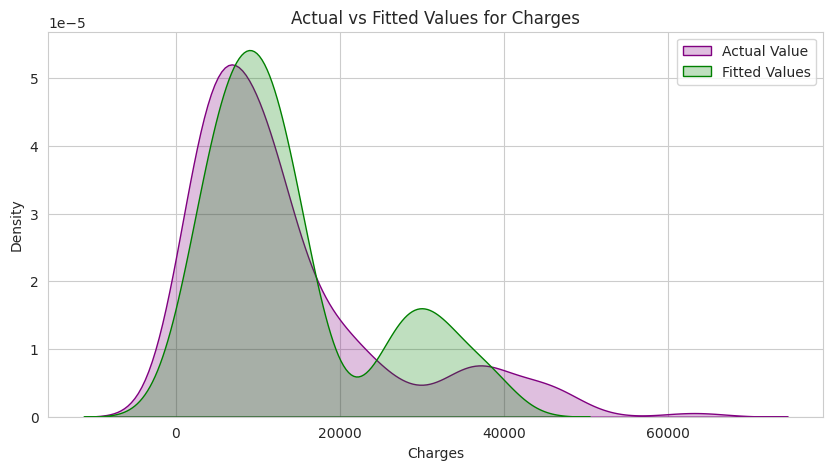

In [108]:
# visualizing the lasso regression results

plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")  # Set the style to whitegrid for better readability

# Create a single axes for the plot
ax = sns.kdeplot(y_test, color="purple", label="Actual Value", fill=True)
sns.kdeplot(y_pred2, color="green", label="Fitted Values", fill=True, ax=ax)

# Set plot title and labels
plt.title('Actual vs Fitted Values for Charges')
plt.xlabel('Charges')
plt.ylabel('Density')
# Add a legend
plt.legend()
# Show the plot
plt.show()

In [109]:
#DATAFRAME FOR ACTUAL AND PREDICTED VALUE
predicted2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2})
predicted2.head()

,Actual,Predicted
650,9800.88820,15513.945191
319,4667.60765,9533.578278
314,34838.87300,28278.799195
150,5125.21570,5396.414303
336,12142.57860,11550.140363


### 4.4 Ridge Regression

In [116]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

In [119]:
#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=101)

#define model
rid_model = RidgeCV(alphas=(0.1,  1.0,  10.0), cv=cv, scoring='neg_mean_absolute_error')
#fit model
rid_model.fit(X_train, y_train)

RidgeCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=101),
        scoring='neg_mean_absolute_error')

In [120]:
print(rid_model.intercept_)
print(rid_model.coef_)
print(rid_model.score(X_test, y_test))

-11965.014892960608
[  258.01087346   -88.66525369   343.85481437   479.33270655
 23687.70601937  -388.32796595]
0.7625932307102401


In [121]:
# model prediction
y_pred3 = rid_model.predict(X_test)

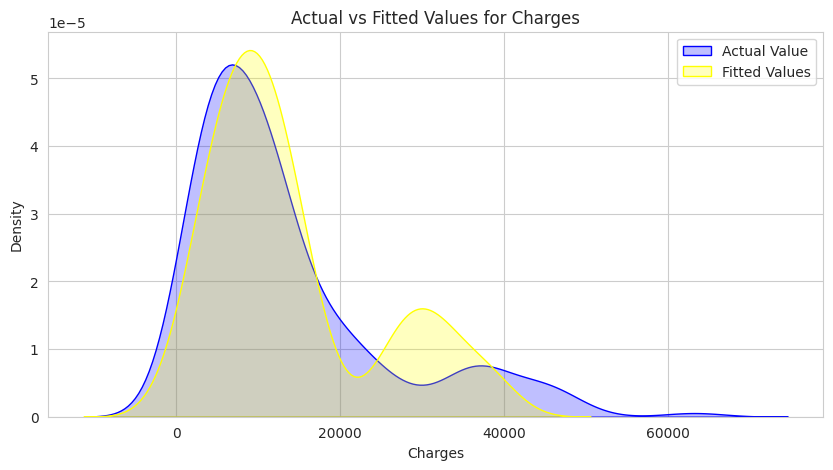

In [123]:
# visualizing the lasso regression results

plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")  # Set the style to whitegrid for better readability

# Create a single axes for the plot
ax = sns.kdeplot(y_test, color="blue", label="Actual Value", fill=True)
sns.kdeplot(y_pred3, color="yellow", label="Fitted Values", fill=True, ax=ax)

# Set plot title and labels
plt.title('Actual vs Fitted Values for Charges')
plt.xlabel('Charges')
plt.ylabel('Density')
# Add a legend
plt.legend()
# Show the plot
plt.show()

In [124]:
#DATAFRAME FOR ACTUAL AND PREDICTED VALUE
predicted3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred3})
predicted3.head()

,Actual,Predicted
650,9800.88820,15535.250865
319,4667.60765,9519.820005
314,34838.87300,28321.041983
150,5125.21570,5364.921836
336,12142.57860,11501.139251


# 5. Model Analysis


In [128]:
from sklearn import metrics
from sklearn.metrics import r2_score
import numpy as np

In [129]:
# Multiple Linear Regression
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

Mean Absolute Error: 4199.3349698042575
Mean Square Error: 33913914.85714985
Root Mean Square Error: 5823.565476334052


In [130]:
# Lasso regression
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred2))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

Mean Absolute Error: 4202.902490535261
Mean Square Error: 33922533.29196901
Root Mean Square Error: 5824.305391372349


In [131]:
# Ridge Regression
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred3))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred3))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

Mean Absolute Error: 4200.601234512191
Mean Square Error: 33915917.30090577
Root Mean Square Error: 5823.737399720713
